# Régression linéaire avec TensorFlow 

Dans ce notebook, on va voir comment utiliser TensorFlow pour entraîner un modèle de régression linéaire sur le jeu de données de *Boston* de Sklearn. 
Le but sera de prédire  le prix des maisons en fonction de leurs caractéristiques. 

## Importation des packages

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.optimizers import SGD

## Importation des données

In [2]:
boston = load_boston()
X = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

X_train, X_test, y_train, y_test = train_test_split(X, boston['target'], test_size=0.33, random_state=42)

std_scaler = StandardScaler().fit(X_train, y_train)

X_train  =  std_scaler.transform(X_train)
X_test = std_scaler.transform(X_test)

X_train_tf = tf.convert_to_tensor(X_train)
X_test_tf = tf.convert_to_tensor(X_test)
y_train_tf = tf.convert_to_tensor(y_train)
y_test_tf = tf.convert_to_tensor(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

## Création de l'architecture

La fonction `Dense` nous permet d'initialiser les poids de notre régression linéaire et d'appliquer une multiplication matricielle entre nos poids et nos exemples. 

Pour plus d'informatons, n'hésitez pas à lire la [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense).

La fonction `Dense`sera déclarer dans un `Sequential` afin d'initialiser le modèle.

Pour plus d'informatons, n'hésitez pas à lire la [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential).


In [3]:
def linear_regression(input_shape, output_shape):
  model = Sequential([Dense(input_shape=(None, input_shape), units=output_shape)])
  return model

Initialiser notre modèle.

In [4]:
X_train_tf.shape

TensorShape([339, 13])

In [5]:
rl_model = linear_regression(13, 1)

Prédire notre jeu d'entraînement.

In [6]:
prediction = rl_model.predict(X_train_tf)

11/11 [==============================] - 0s 2ms/step


In [7]:
mean_absolute_error(prediction, y_train)

22.970796442682413

## Définir la fonction de coût

Nous allons maintenant initialiser notre fonction de coût.

Vous pouvez trouver les différentes fonctions de coût implémenter par TensorFlow dans la [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/losses).

In [8]:
loss = MeanAbsoluteError()

## Définir l'algorithme d'optimisation

Nous allons maintenant initialiser notre fonction d'optimisation qui va mettre à jour nos poids. Il existe des améliorations du gradient descent censé être plus rapide et performant. 

Vous pouvez trouver les différents algorithmes d'optimisation implémenter par Tensorflow dans la [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers).

In [9]:
opt = SGD(lr=0.1)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


## Définir la fonction d'entraînement

Nous allons maintenant initialiser la fonction d'entraînement de notre modèle en utilisant notre modèle, notre fonction de coût et notre algorithme d'optimisation.

In [14]:
def step(model, opt, loss, X, y):

  # garder la trace de nos gradients
  with tf.GradientTape() as tape:
    # faire une prédiction en utilisant le modèle, puis calculer le coût
	  pred = model(X)
	  train_loss = loss(y, pred)
  
	# calculer les gradients en utilisant tape 
  grads = tape.gradient(train_loss, model.trainable_variables)

  # mettre à jour les poids du modèle
  opt.apply_gradients(zip(grads, model.trainable_variables))
 
  return model, train_loss

## Entraîner notre modèle

Il est maintenant temps d'entraîner notre modèle

In [15]:
epoch = 1000
history_train = []
history_test = []

for e in range(epoch) : 

  # mise à jour des poids
  rl_model, train_loss = step(rl_model, opt, loss, X_train_tf, y_train_tf)

  # prédiction sur le jeu de test
  test_pred = rl_model(X_test_tf)
  test_loss = mean_absolute_error(test_pred, y_test)

  # sauvegarde des coûts
  history_train = np.append(history_train, train_loss)
  history_test = np.append(history_test, test_loss)

  print('train_loss : '+str(np.squeeze(train_loss))+ ' test_loss : '+str(test_loss))


train_loss : 3.1393619 test_loss : 3.1489996641695854
train_loss : 3.1393716 test_loss : 3.147651294319929
train_loss : 3.1393943 test_loss : 3.148639215252356
train_loss : 3.1393628 test_loss : 3.1489428548755756
train_loss : 3.1393363 test_loss : 3.1496999694915586
train_loss : 3.1393952 test_loss : 3.1477805200451145
train_loss : 3.1393871 test_loss : 3.148768498083788
train_loss : 3.1393409 test_loss : 3.149072211945128
train_loss : 3.139335 test_loss : 3.147443861590174
train_loss : 3.139467 test_loss : 3.14788011904962
train_loss : 3.139384 test_loss : 3.148663239850255
train_loss : 3.1393323 test_loss : 3.1492613192803844
train_loss : 3.1393387 test_loss : 3.147893350566932
train_loss : 3.139446 test_loss : 3.148303441944236
train_loss : 3.1393683 test_loss : 3.1490866712467396
train_loss : 3.1393194 test_loss : 3.1493904022399533
train_loss : 3.1393485 test_loss : 3.1477884463921275
train_loss : 3.1394439 test_loss : 3.148224618192204
train_loss : 3.13935 test_loss : 3.14900775

Visualisation de l'évolution du coût pendant l'entraînement. 

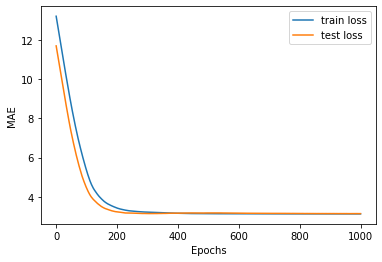

In [ ]:
plt.plot(np.arange(epoch), history_train, label='train loss')
plt.plot(np.arange(epoch), history_test, label='test loss')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## Sauvegarde du modèle

Maintenant que notre modèle est entraîné, il est temps de le sauvegarder.

In [ ]:
rl_model.save_weights('linear_regression')

Initalisons à nouveau notre modèlre à random.

In [ ]:
rl_model = linear_regression(1)

In [ ]:
prediction = rl_model(X_train_tf)
mean_absolute_error(prediction, y_train)

22.970796430185107

Nous pouvons revenir à nos poids entraîner en charger nos précédens poids.

In [ ]:
rl_model.load_weights('linear_regression')

In [ ]:
prediction = rl_model(X_train_tf)
mean_absolute_error(prediction, y_train)

3.1392853306458064